In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from tensorflow.keras import datasets

In [ ]:
(X_train, Y_train), (X_test, Y_test) = datasets.fashion_mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
label = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

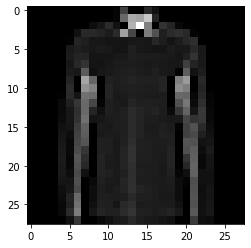

Shirt


In [ ]:
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample], cmap = 'gray')
plt.show()
print(label[Y_train[my_sample]])

In [ ]:
print(X_train[my_sample])

[[  0   0   0   0   0   0   0   0   0   0   0   4  66   2   0  39  17   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   5 103 169 162 198  36   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  13  23  43  18   0 180 255 128   2  50
   36   8   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  17  40  40  37  28  42 160  70   0 124  82  31
   43  47  40   4   0   0   0   0   0   0]
 [  0   0   0   0   0   2  37  31  23  23  21  21  20  24  24  23  39  29
   20  28  39  46   0   0   0   0   0   0]
 [  0   0   0   0   0  25  33  27  24  27  24  20  20  32  24  23  20  21
   28  24  24  40  24   0   0   0   0   0]
 [  0   0   0   0   0  28  36  36  21  21  21  24  25  31  29  28  28  27
   25  21  31  51  25   0   0   0   0   0]
 [  0   0   0   0   0  23  40  51  20  20  24  27  28  29  27  25  27  24
   23  23  63  35  25   0   0   0   0   0]
 [  0   0   0   0   0  27  24  92  16  23  25  28  31  32  29  2

In [ ]:
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [ ]:
print(Y_train[5000])
print(y_train[5000])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
x_train = X_train / 255
x_test = X_test / 255
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape = (28,28,1), padding = 'same', activation='relu'))
model.add(MaxPooling2D(padding = 'same', pool_size = (2, 2)))
model.add(Conv2D(32, kernel_size = (3,3),padding = 'same', activation='relu'))
model.add(MaxPooling2D(padding = 'same', pool_size = (2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu')) #Dense 클래스는 (완전 연결된) 하나의 뉴런층을 구현
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax')) #3개의 값을 쓸때는 softmax
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1568)              0         
                                                                 
 dropout_6 (Dropout)         (None, 1568)             

In [ ]:
opt = Adam(lr = 0.01)
model.compile(opt, loss='categorical_crossentropy', metrics= ['accuracy'])
fit_hist = model.fit(x_train, y_train, batch_size=256, epochs=15, validation_split = 0.2, verbose=1)

Epoch 1/15
188/188 [==============================] - 3s 10ms/step - loss: 0.5452 - accuracy: 0.8010 - val_loss: 0.3468 - val_accuracy: 0.8700
Epoch 2/15
188/188 [==============================] - 1s 7ms/step - loss: 0.3397 - accuracy: 0.8753 - val_loss: 0.2985 - val_accuracy: 0.8928
Epoch 3/15
188/188 [==============================] - 1s 7ms/step - loss: 0.3027 - accuracy: 0.8869 - val_loss: 0.2908 - val_accuracy: 0.8879
Epoch 4/15
188/188 [==============================] - 1s 8ms/step - loss: 0.2803 - accuracy: 0.8960 - val_loss: 0.2759 - val_accuracy: 0.8983
Epoch 5/15
188/188 [==============================] - 2s 10ms/step - loss: 0.2616 - accuracy: 0.9017 - val_loss: 0.2628 - val_accuracy: 0.9000
Epoch 6/15
188/188 [==============================] - 2s 11ms/step - loss: 0.2480 - accuracy: 0.9073 - val_loss: 0.2643 - val_accuracy: 0.8983
Epoch 7/15
188/188 [==============================] - 2s 10ms/step - loss: 0.2438 - accuracy: 0.9090 - val_loss: 0.2533 - val_accuracy: 0.9069
Ep

In [ ]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Final test set accuracy', score[1])

Final test set accuracy 0.9035000205039978


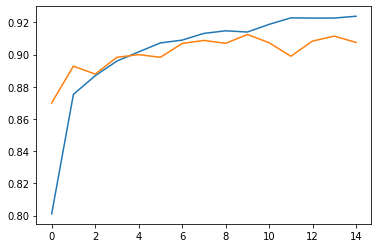

In [ ]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()

Trouser


ValueError: ignored

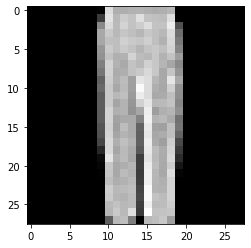

In [ ]:
my_sample = np.random.randint(10000)
plt.imshow(X_test[my_sample], cmap = 'gray')
print(label[Y_test[my_sample]])
pred = model.predict(x_test[my_sample].reshape(-1, 784))
print(pred)
print(label[np.argmax(pred)])